## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  85.312032   370.741040  0.433808  9.694400  1.232548
1   4.482324   533.422959  0.002815  2.803515  0.321881
2  60.714383  1327.919068  0.790231  5.757376  1.645945
3   0.012364  1611.074745  0.161884  1.635966  1.587618
4  69.516295   224.989983  0.984064  4.967835  1.363144


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.74095 | train_mse: 4.12299 | train_mae: 1.54018 |  0:00:00s
epoch 1  | loss: 0.64713 | train_mse: 5.09251 | train_mae: 1.632   |  0:00:00s


epoch 2  | loss: 0.5626  | train_mse: 6.04698 | train_mae: 1.80186 |  0:00:00s
epoch 3  | loss: 0.534   | train_mse: 3.82046 | train_mae: 1.50314 |  0:00:00s


epoch 4  | loss: 0.37642 | train_mse: 1.31404 | train_mae: 0.86696 |  0:00:00s
epoch 5  | loss: 0.24736 | train_mse: 1.225   | train_mae: 0.82214 |  0:00:00s
epoch 6  | loss: 0.43451 | train_mse: 1.44991 | train_mae: 0.89676 |  0:00:00s


epoch 7  | loss: 0.25367 | train_mse: 1.18449 | train_mae: 0.78693 |  0:00:01s
epoch 8  | loss: 0.23263 | train_mse: 1.08217 | train_mae: 0.76755 |  0:00:01s


epoch 9  | loss: 0.22562 | train_mse: 0.7204  | train_mae: 0.68239 |  0:00:01s
epoch 10 | loss: 0.25749 | train_mse: 0.63229 | train_mae: 0.64388 |  0:00:01s


epoch 11 | loss: 0.17486 | train_mse: 0.52723 | train_mae: 0.59311 |  0:00:01s
epoch 12 | loss: 0.28132 | train_mse: 0.36531 | train_mae: 0.48918 |  0:00:01s


epoch 13 | loss: 0.31804 | train_mse: 0.31274 | train_mae: 0.44068 |  0:00:01s
epoch 14 | loss: 0.19829 | train_mse: 0.41874 | train_mae: 0.48397 |  0:00:01s


epoch 15 | loss: 0.13929 | train_mse: 0.51155 | train_mae: 0.48653 |  0:00:02s
epoch 16 | loss: 0.20842 | train_mse: 0.67265 | train_mae: 0.57208 |  0:00:02s


epoch 17 | loss: 0.2597  | train_mse: 0.41005 | train_mae: 0.48007 |  0:00:02s
epoch 18 | loss: 0.21239 | train_mse: 0.29703 | train_mae: 0.41886 |  0:00:02s


epoch 19 | loss: 0.13887 | train_mse: 0.31646 | train_mae: 0.40364 |  0:00:02s
epoch 20 | loss: 0.255   | train_mse: 0.26353 | train_mae: 0.38688 |  0:00:02s


epoch 21 | loss: 0.19817 | train_mse: 0.20777 | train_mae: 0.34713 |  0:00:02s
epoch 22 | loss: 0.18142 | train_mse: 0.22318 | train_mae: 0.35845 |  0:00:02s


epoch 23 | loss: 0.2528  | train_mse: 0.30452 | train_mae: 0.40545 |  0:00:02s
epoch 24 | loss: 0.12877 | train_mse: 0.26881 | train_mae: 0.37031 |  0:00:03s
epoch 25 | loss: 0.18564 | train_mse: 0.24723 | train_mae: 0.34044 |  0:00:03s


epoch 26 | loss: 0.24491 | train_mse: 0.21546 | train_mae: 0.32155 |  0:00:03s
epoch 27 | loss: 0.18874 | train_mse: 0.17208 | train_mae: 0.31293 |  0:00:03s


epoch 28 | loss: 0.22167 | train_mse: 0.13682 | train_mae: 0.29662 |  0:00:03s
epoch 29 | loss: 0.18684 | train_mse: 0.12199 | train_mae: 0.28189 |  0:00:03s


epoch 30 | loss: 0.39336 | train_mse: 0.13841 | train_mae: 0.29581 |  0:00:04s
epoch 31 | loss: 0.34109 | train_mse: 0.15989 | train_mae: 0.30667 |  0:00:04s
epoch 32 | loss: 0.21831 | train_mse: 0.18785 | train_mae: 0.32971 |  0:00:04s


epoch 33 | loss: 0.17826 | train_mse: 0.13602 | train_mae: 0.28357 |  0:00:04s


epoch 34 | loss: 0.12711 | train_mse: 0.12565 | train_mae: 0.27481 |  0:00:04s
epoch 35 | loss: 0.27495 | train_mse: 0.1175  | train_mae: 0.26258 |  0:00:04s


epoch 36 | loss: 0.21077 | train_mse: 0.13407 | train_mae: 0.27024 |  0:00:05s
epoch 37 | loss: 0.30564 | train_mse: 0.17926 | train_mae: 0.30097 |  0:00:05s


epoch 38 | loss: 0.15226 | train_mse: 0.24627 | train_mae: 0.34136 |  0:00:05s
epoch 39 | loss: 0.18007 | train_mse: 0.30492 | train_mae: 0.35196 |  0:00:05s


epoch 40 | loss: 0.17165 | train_mse: 0.20298 | train_mae: 0.30078 |  0:00:05s


epoch 41 | loss: 0.11811 | train_mse: 0.15762 | train_mae: 0.29937 |  0:00:05s


epoch 42 | loss: 0.12634 | train_mse: 0.14632 | train_mae: 0.29734 |  0:00:06s


epoch 43 | loss: 0.16605 | train_mse: 0.12902 | train_mae: 0.28741 |  0:00:06s


epoch 44 | loss: 0.16229 | train_mse: 0.122   | train_mae: 0.27652 |  0:00:06s
epoch 45 | loss: 0.08154 | train_mse: 0.09307 | train_mae: 0.24189 |  0:00:07s


epoch 46 | loss: 0.0996  | train_mse: 0.0904  | train_mae: 0.23606 |  0:00:07s
epoch 47 | loss: 0.09088 | train_mse: 0.11641 | train_mae: 0.25483 |  0:00:07s


epoch 48 | loss: 0.17308 | train_mse: 0.16942 | train_mae: 0.27656 |  0:00:07s
epoch 49 | loss: 0.14276 | train_mse: 0.15885 | train_mae: 0.26982 |  0:00:07s


epoch 50 | loss: 0.28088 | train_mse: 0.13598 | train_mae: 0.26131 |  0:00:07s
epoch 51 | loss: 0.15579 | train_mse: 0.10804 | train_mae: 0.24534 |  0:00:07s
epoch 52 | loss: 0.27759 | train_mse: 0.09377 | train_mae: 0.24629 |  0:00:07s


epoch 53 | loss: 0.14335 | train_mse: 0.09006 | train_mae: 0.23568 |  0:00:08s
epoch 54 | loss: 0.19418 | train_mse: 0.10678 | train_mae: 0.23962 |  0:00:08s
epoch 55 | loss: 0.15767 | train_mse: 0.11038 | train_mae: 0.24021 |  0:00:08s


epoch 56 | loss: 0.09056 | train_mse: 0.10491 | train_mae: 0.24308 |  0:00:08s
epoch 57 | loss: 0.13014 | train_mse: 0.08165 | train_mae: 0.22386 |  0:00:08s
epoch 58 | loss: 0.10725 | train_mse: 0.09116 | train_mae: 0.2271  |  0:00:08s


epoch 59 | loss: 0.14333 | train_mse: 0.12943 | train_mae: 0.25241 |  0:00:08s
epoch 60 | loss: 0.15659 | train_mse: 0.09141 | train_mae: 0.23433 |  0:00:08s
epoch 61 | loss: 0.16468 | train_mse: 0.08135 | train_mae: 0.23066 |  0:00:08s


epoch 62 | loss: 0.15573 | train_mse: 0.07967 | train_mae: 0.22883 |  0:00:08s
epoch 63 | loss: 0.17724 | train_mse: 0.06388 | train_mae: 0.20948 |  0:00:08s


epoch 64 | loss: 0.09349 | train_mse: 0.05808 | train_mae: 0.19902 |  0:00:09s
epoch 65 | loss: 0.16108 | train_mse: 0.06281 | train_mae: 0.20708 |  0:00:09s


epoch 66 | loss: 0.31292 | train_mse: 0.06241 | train_mae: 0.20847 |  0:00:09s
epoch 67 | loss: 0.22291 | train_mse: 0.06897 | train_mae: 0.21355 |  0:00:09s
epoch 68 | loss: 0.12915 | train_mse: 0.06399 | train_mae: 0.20789 |  0:00:09s


epoch 69 | loss: 0.14793 | train_mse: 0.06438 | train_mae: 0.2039  |  0:00:09s
epoch 70 | loss: 0.15066 | train_mse: 0.06851 | train_mae: 0.21061 |  0:00:09s


epoch 71 | loss: 0.24013 | train_mse: 0.0831  | train_mae: 0.22432 |  0:00:09s
epoch 72 | loss: 0.13242 | train_mse: 0.11656 | train_mae: 0.2568  |  0:00:09s


epoch 73 | loss: 0.16191 | train_mse: 0.17675 | train_mae: 0.30077 |  0:00:10s
epoch 74 | loss: 0.10386 | train_mse: 0.09414 | train_mae: 0.24378 |  0:00:10s
epoch 75 | loss: 0.18645 | train_mse: 0.08216 | train_mae: 0.22675 |  0:00:10s


epoch 76 | loss: 0.15472 | train_mse: 0.08144 | train_mae: 0.22873 |  0:00:10s
epoch 77 | loss: 0.1689  | train_mse: 0.07471 | train_mae: 0.22349 |  0:00:10s
epoch 78 | loss: 0.16794 | train_mse: 0.06963 | train_mae: 0.21543 |  0:00:10s


epoch 79 | loss: 0.08688 | train_mse: 0.08752 | train_mae: 0.2233  |  0:00:10s
epoch 80 | loss: 0.13547 | train_mse: 0.0825  | train_mae: 0.21485 |  0:00:10s
epoch 81 | loss: 0.13658 | train_mse: 0.0848  | train_mae: 0.22798 |  0:00:10s


epoch 82 | loss: 0.14028 | train_mse: 0.08645 | train_mae: 0.22589 |  0:00:10s
epoch 83 | loss: 0.15229 | train_mse: 0.09219 | train_mae: 0.23533 |  0:00:11s


epoch 84 | loss: 0.10122 | train_mse: 0.07106 | train_mae: 0.21364 |  0:00:11s
epoch 85 | loss: 0.28347 | train_mse: 0.06569 | train_mae: 0.20511 |  0:00:11s
epoch 86 | loss: 0.10499 | train_mse: 0.06232 | train_mae: 0.20987 |  0:00:11s


epoch 87 | loss: 0.10136 | train_mse: 0.0623  | train_mae: 0.20641 |  0:00:11s
epoch 88 | loss: 0.10975 | train_mse: 0.06804 | train_mae: 0.21748 |  0:00:11s


epoch 89 | loss: 0.11599 | train_mse: 0.07767 | train_mae: 0.22697 |  0:00:11s
epoch 90 | loss: 0.10134 | train_mse: 0.06169 | train_mae: 0.20385 |  0:00:11s
epoch 91 | loss: 0.19535 | train_mse: 0.05873 | train_mae: 0.19494 |  0:00:11s


epoch 92 | loss: 0.15427 | train_mse: 0.05934 | train_mae: 0.19118 |  0:00:12s
epoch 93 | loss: 0.25747 | train_mse: 0.06179 | train_mae: 0.1995  |  0:00:12s
epoch 94 | loss: 0.09922 | train_mse: 0.06149 | train_mae: 0.2033  |  0:00:12s


epoch 95 | loss: 0.08331 | train_mse: 0.0667  | train_mae: 0.21173 |  0:00:12s
epoch 96 | loss: 0.08876 | train_mse: 0.06622 | train_mae: 0.2118  |  0:00:12s
epoch 97 | loss: 0.09108 | train_mse: 0.0663  | train_mae: 0.20961 |  0:00:12s


epoch 98 | loss: 0.1049  | train_mse: 0.07765 | train_mae: 0.2269  |  0:00:12s
epoch 99 | loss: 0.11003 | train_mse: 0.09392 | train_mae: 0.23982 |  0:00:12s
epoch 100| loss: 0.05838 | train_mse: 0.16198 | train_mae: 0.26231 |  0:00:12s


epoch 101| loss: 0.1345  | train_mse: 0.214   | train_mae: 0.27191 |  0:00:12s
epoch 102| loss: 0.14639 | train_mse: 0.11497 | train_mae: 0.21819 |  0:00:12s
epoch 103| loss: 0.11353 | train_mse: 0.07858 | train_mae: 0.20022 |  0:00:13s


epoch 104| loss: 0.06899 | train_mse: 0.07053 | train_mae: 0.19434 |  0:00:13s
epoch 105| loss: 0.11041 | train_mse: 0.07804 | train_mae: 0.21123 |  0:00:13s
epoch 106| loss: 0.16345 | train_mse: 0.08178 | train_mae: 0.22112 |  0:00:13s


epoch 107| loss: 0.09264 | train_mse: 0.08336 | train_mae: 0.22323 |  0:00:13s
epoch 108| loss: 0.08446 | train_mse: 0.07235 | train_mae: 0.21147 |  0:00:13s


epoch 109| loss: 0.093   | train_mse: 0.074   | train_mae: 0.20807 |  0:00:13s
epoch 110| loss: 0.11736 | train_mse: 0.07063 | train_mae: 0.20639 |  0:00:13s


epoch 111| loss: 0.16551 | train_mse: 0.07134 | train_mae: 0.20667 |  0:00:13s
epoch 112| loss: 0.14118 | train_mse: 0.09179 | train_mae: 0.22738 |  0:00:14s


epoch 113| loss: 0.08142 | train_mse: 0.12214 | train_mae: 0.25847 |  0:00:14s
epoch 114| loss: 0.12291 | train_mse: 0.28475 | train_mae: 0.30547 |  0:00:14s
epoch 115| loss: 0.17467 | train_mse: 0.12739 | train_mae: 0.24939 |  0:00:14s


epoch 116| loss: 0.20693 | train_mse: 0.06537 | train_mae: 0.20783 |  0:00:14s
epoch 117| loss: 0.05625 | train_mse: 0.06031 | train_mae: 0.20176 |  0:00:14s


epoch 118| loss: 0.07639 | train_mse: 0.05998 | train_mae: 0.2017  |  0:00:14s
epoch 119| loss: 0.08961 | train_mse: 0.06188 | train_mae: 0.1985  |  0:00:14s
epoch 120| loss: 0.10416 | train_mse: 0.07067 | train_mae: 0.20653 |  0:00:14s


epoch 121| loss: 0.17774 | train_mse: 0.07575 | train_mae: 0.21129 |  0:00:14s
epoch 122| loss: 0.12739 | train_mse: 0.07646 | train_mae: 0.21319 |  0:00:15s


epoch 123| loss: 0.07566 | train_mse: 0.08984 | train_mae: 0.22792 |  0:00:15s
epoch 124| loss: 0.08154 | train_mse: 0.14543 | train_mae: 0.25596 |  0:00:15s
epoch 125| loss: 0.11803 | train_mse: 0.11084 | train_mae: 0.23567 |  0:00:15s


epoch 126| loss: 0.24501 | train_mse: 0.07224 | train_mae: 0.20454 |  0:00:15s
epoch 127| loss: 0.12718 | train_mse: 0.06526 | train_mae: 0.19445 |  0:00:15s


epoch 128| loss: 0.09171 | train_mse: 0.07126 | train_mae: 0.20939 |  0:00:15s
epoch 129| loss: 0.16035 | train_mse: 0.08638 | train_mae: 0.23148 |  0:00:15s


epoch 130| loss: 0.07236 | train_mse: 0.19887 | train_mae: 0.29319 |  0:00:15s
epoch 131| loss: 0.20083 | train_mse: 0.24868 | train_mae: 0.32402 |  0:00:16s


epoch 132| loss: 0.13054 | train_mse: 0.19236 | train_mae: 0.28197 |  0:00:16s
epoch 133| loss: 0.26179 | train_mse: 0.12941 | train_mae: 0.25858 |  0:00:16s


epoch 134| loss: 0.17467 | train_mse: 0.10188 | train_mae: 0.2397  |  0:00:16s
epoch 135| loss: 0.16439 | train_mse: 0.11993 | train_mae: 0.23841 |  0:00:16s


epoch 136| loss: 0.12135 | train_mse: 0.17395 | train_mae: 0.28735 |  0:00:17s
epoch 137| loss: 0.11763 | train_mse: 0.15219 | train_mae: 0.2707  |  0:00:17s


epoch 138| loss: 0.10268 | train_mse: 0.12835 | train_mae: 0.25318 |  0:00:17s


epoch 139| loss: 0.10783 | train_mse: 0.12799 | train_mae: 0.25245 |  0:00:17s


epoch 140| loss: 0.0888  | train_mse: 0.14099 | train_mae: 0.25836 |  0:00:18s
epoch 141| loss: 0.12677 | train_mse: 0.1825  | train_mae: 0.28123 |  0:00:18s


epoch 142| loss: 0.09304 | train_mse: 0.19835 | train_mae: 0.28895 |  0:00:18s

Early stopping occurred at epoch 142 with best_epoch = 92 and best_train_mae = 0.19118
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

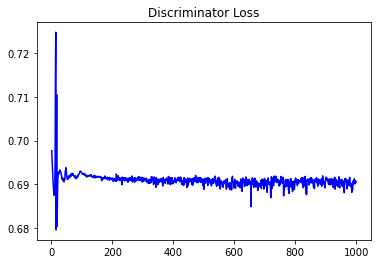

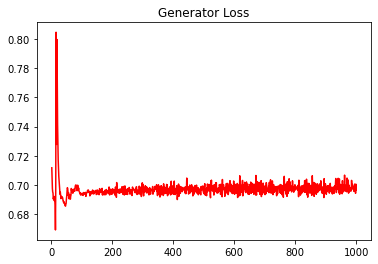

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2770441574112181


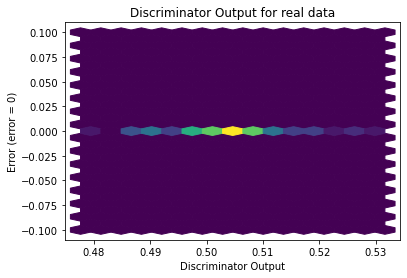

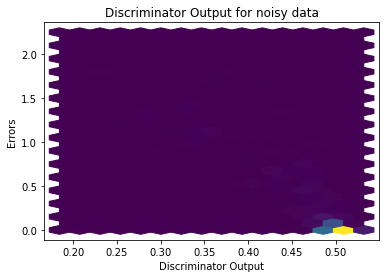

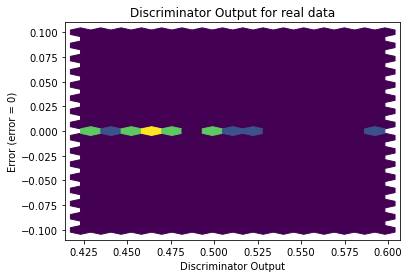

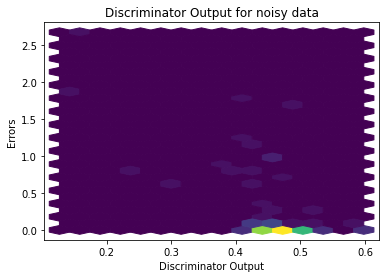

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


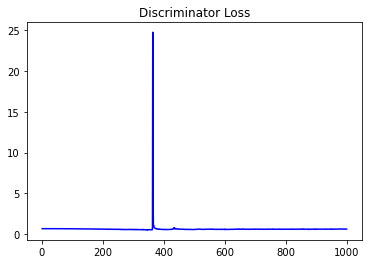

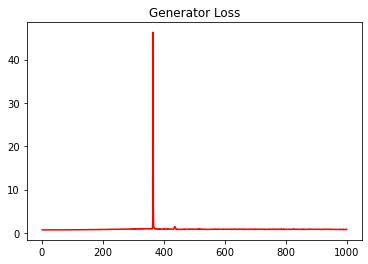

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22509675574748375


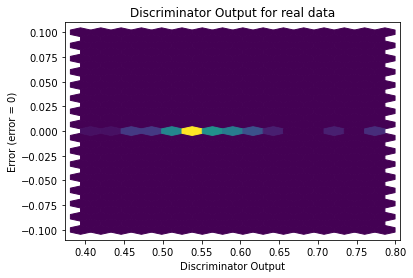

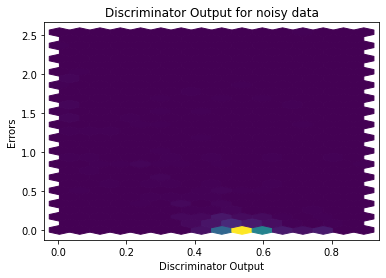

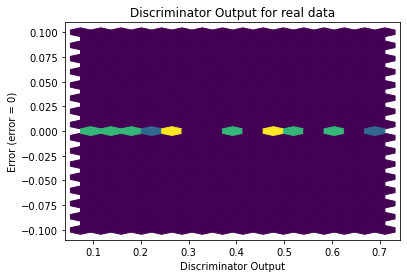

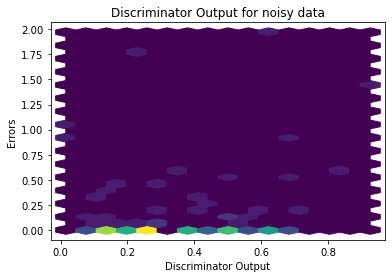

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0722]], requires_grad=True)
